# AI06 - TD02 : Statistiques pour la mesure

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Exercice 1

In [38]:
df = pd.DataFrame({
    'A' : [9.27, 8.91, 11.16, 8.86, 7.93, 11.58, 8.89, 13.18, 7.27, 13.01],
    'B' : [9.6, 9.8, 9.65, 9.96, 10.36, 10.9, 10.39, 10.02, 10.21, 10.66]
})

df

,A,B
0,9.27,9.60
1,8.91,9.80
2,11.16,9.65
3,8.86,9.96
4,7.93,10.36
5,11.58,10.90
6,8.89,10.39
7,13.18,10.02
8,7.27,10.21
9,13.01,10.66


In [39]:
df.describe()

,A,B
count,10.00000,10.000000
mean,10.00600,10.155000
std,2.08179,0.428907
min,7.27000,9.600000
25%,8.86750,9.840000
50%,9.09000,10.115000
75%,11.47500,10.382500
max,13.18000,10.900000


Question 1 : Capteur le plus juste : A (moyenne la plus proche de la valeur théorique)

Question 2 : Capteur le plus fidèle : B (écart type le plus faible)

Supposons que A ne soit pas biaisé et que B soit biaisé constamment de +15cm. 

$\mu_A = 0m$, $\mu_B = 0.15m$

$\sigma_A = 2m$, $\sigma_B = 0.5m$

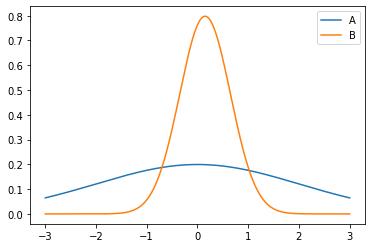

In [40]:
x = np.linspace(-3, 3, 1000)

ya = norm.pdf(x, loc=0, scale=2)
yb = norm.pdf(x, loc=.15, scale=.5)

plt.plot(x, ya, label='A')
plt.plot(x, yb, label='B')
plt.legend()
plt.show()

### Question 3

$\mathcal{E}_A \sim \mathcal{N}(\mu_A, \sigma_A^2)$

$$
\begin{align*}
P(|\mathcal{E}_A|\geq 0.1) &= P(\mathcal{E}_A \leq 0.1 || \mathcal{E}_A \geq 0.1) \\
                         &= P(\mathcal{E}_A \leq 0.1) + P(\mathcal{E}_A \geq 0.1) \\
                         &= P\left(\frac{\mathcal{E}_A}{\sigma_A} \leq -\frac{0.1}{\sigma_A}\right) +  P\left(\frac{\mathcal{E}_A}{\sigma_A} \geq \frac{0.1}{\sigma_A}\right) \\
                         &= \Phi\left(\frac{0.1}{\sigma_A}\right) + 1 - \Phi\left(\frac{0.1}{\sigma_A}\right) \\
                         &= 2[1 - \Phi(0.05] \\
                         &= 2[1 - 0,5199] \\
                         &= 0.9602
\end{align*}
$$

$\mathcal{E}_B \sim \mathcal{N}(\mu_B, \sigma_B^2)$

$\frac{\mathcal{E}_B - \mu_B}{\sigma_B} \sim \mathcal{N}(0,1)$

$$
\begin{align*}
P(|\mathcal{E}_B|\geq 0.1) &= P(\mathcal{E}_B \leq 0.1 || \mathcal{E}_B \geq 0.1) \\
                         &= P(\mathcal{E}_A \leq 0.1) + P(\mathcal{E} \geq 0.1) \\
                         &= P\left(\frac{\mathcal{E}_B - \mu_B}{\sigma_B} \leq -\frac{0.1 - \mu_B}{\sigma_B}\right) +  P\left(\frac{\mathcal{E}_B - \mu_B}{\sigma_B} \geq \frac{0.1 - \mu_B}{\sigma_B}\right) \\
                         &= \Phi\left(\frac{0.1 - \mu_B}{\sigma_B}\right) + 1 - \Phi\left(\frac{0.1 - \mu_B}{\sigma_B}\right) \\
                         &= \Phi\left(-\frac{0.25}{0.5}\right) + 1 - \Phi\left(-\frac{0.05}{0.5}\right) \\
                         &= \Phi(-0.5) + 1 - \Phi(-0.1) \\
                         &= 1 - \Phi(0.5) + 1 - 1 + \Phi(0.1) \\
                         &= 1 - 0.6915 + 0.5398 \\
                         &= 0.8483
\end{align*}
$$

### Question 4

$\bar{\mathcal{E}_A} \sim \mathcal{N}(0, \frac{\sigma_A^2}{n})$ : moyenne sur $n$ valeurs

$\bar{\mathcal{E}_B} \sim \mathcal{N}(\mu_B, \frac{\sigma_B^2}{n})$ : moyenne sur $n$ valeurs

$P(|\mathcal{E}_A| \geq 0.1) = 2\left(1 - \Phi\left(\frac{0.1}{\sigma_A}\right)\right)$

$P(|\bar{\mathcal{E}_A}| \geq 0.1) = 2\left(1 - \Phi\left(\frac{0.1}{\sigma_A/\sqrt{n}}\right)\right)$

$P(|\mathcal{E}_B| \geq 0.1) = 1 - \Phi\left(\frac{0.1 + \mu_B}{\sigma_B}\right) + \Phi\left(\frac{\mu_B - 0.1}{\sigma_B}\right)$

$P(|\bar{\mathcal{E}_B}| \geq 0.1) = 1 - \Phi\left(\frac{0.1 + \mu_B}{\sigma_B / \sqrt{n}}\right) + \Phi\left(\frac{\mu_B - 0.1}{\sigma_B / \sqrt{n}}\right)$

A partir de $n = 43$, la probabilité d'avoir une erreur supérieure à 10cm devient plus petite avec le capteur A qu'avec le capteur B.

### Question 5

$\alpha = 0.05$
$$
\begin{align*}
P(|\bar{\mathcal{E}_A} \leq 0.1) \leq 1 - \alpha &\Leftrightarrow 1 - P(|\bar{\mathcal{E}_A}\geq 0.1) \geq 1 - \alpha \\
                                                 &\Leftrightarrow 2\left(1 - \Phi\left(\frac{0.1\sqrt{n}}{\sigma_A}\right)\right) \leq \alpha \\
                                                 &\Leftrightarrow \Phi\left(\frac{0.1\sqrt{n}}{\sigma_A}\right) \geq 1 - \frac{\alpha}{2} \\
                                                 &\Leftrightarrow \frac{0.1\sqrt{n}}{\sigma_A} \geq \Phi^{-1}\left(1 - \frac{\alpha}{2}\right) \\
                                                 &\Leftrightarrow \sqrt{n} \geq\left(\frac{\Phi^{-1}\left(1 - \frac{\alpha}{2}\right)\sigma_A}{0.1}\right) \\
                                                 &\Leftrightarrow n \geq \left(\frac{\Phi^{-1}\left(1 - \frac{\alpha}{2}\right)\sigma_A}{0.1}\right)^2 \\
                                                 &\Leftrightarrow n \geq \left(\frac{u_{1 - \frac{\alpha}{2}}\sigma_A}{0.1} \right)^2 \\
                                                 &\Leftrightarrow n  \geq \left(\frac{u_{0.975}\sigma_A}{0.1} \right)^2 \\
                                                 &\Leftrightarrow n \geq \left(\frac{1.96*2}{0.1}\right)^2 \\
                                                 &\Leftrightarrow n \geq 1536.64
\end{align*}
$$

## Exercice 2

### Question 1

In [41]:
serie = pd.Series([0,2,2,3,1,3,1,2,0,1,4,0,2,1,2,1,3,1,0,2])
serie.describe()

count    20.000000
mean      1.550000
std       1.145931
min       0.000000
25%       1.000000
50%       1.500000
75%       2.000000
max       4.000000
dtype: float64

(array([4., 6., 6., 3., 1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

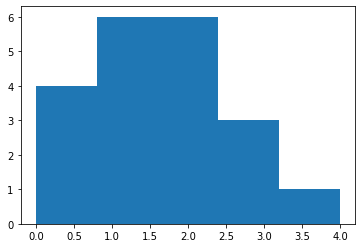

In [42]:
plt.hist(serie, bins=5)

### Question 2

Bienaymé-Tchebycheff : 

$\forall \epsilon > 0$, $\mathbb{P}(|X - \mathbb{E}(X)|\geq \epsilon) \leq \frac{Var(X)}{\epsilon^2} $

Montrer que : 

$\forall h > 0, \mathbb{P}(|X - \mathbb{E}(X)|\geq h * \text{sd}(X)) \geq 1 - \frac{1}{h^2}$, avec $\text{sd}(X) = \sqrt{Var(X)}$

Solution : on pose $\epsilon = h * \text{sd}(X)$

### Question 3

On cherche $\mathbb{P}(|X - \mathbb{E}(X)| \leq h*\text{sd}(X)) \geq \frac{3}{4}$

$1 - \frac{1}{h^2} = \frac{3}{4} \Rightarrow h = 2$

On a alors : 

$h = 2, $
$$
\begin{align*}
\mathbb{P}(|X - \mathbb{E}(X)|\geq 2 * \text{sd}(X)) &\geq \frac{3}{4} \\
\mathbb{P}(-2*\text{sd}(X) \leq X - \mathbb{E}(X) \leq 2 * \text{sd}(X)) &\geq \frac{3}{4} \\
\mathbb{P}(\mathbb{E}(X) -2*\text{sd}(X) \leq X \leq \mathbb{E}(X) + 2 * \text{sd}(X)) &\geq \frac{3}{4} \\
x &\in [\bar{x} - 2s^*; \bar{x} + 2s^*]
\end{align*}
$$




### Question 4

Cet intervalle va contenir 95% des valeurs, soit plus que les 75% attendus